In [10]:
from Functions import Robot 
import os
import sys
import time
import numpy as np
import math as m
import pandas as pd
import math as m

from Functions import Utilities 
# Import the necessary packages and modules
import matplotlib.pyplot as plt

ut = Utilities.Utilities()



Plot the path estimated with the astolfi controller

len 4


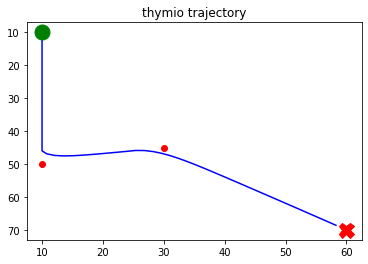

In [14]:
#Those Parameters can be modified to test our Controller

############################################################################################################

global_path = [(10.,10.),(10.,50.),(30,45),(60,70)] # Point of the global path [(xstart,ystart),....,(xgoal,ygoal)]

InitAngle=m.pi/2
kp = 1.5 
ka = 18 
kb = -4 

##############################################################################################################

# Initialise robot class
Init_pos = np.array([global_path[0][0],global_path[0][1],InitAngle])
Ts = 0.1


vTOm=30.30
wTOm=(200*180)/(80*m.pi)  

# INIT PARAMETERS FOR THE ROBOT : 
thym = Robot.Robot(global_path,Init_pos,Ts, kp,ka,kb,vTOm,wTOm)

# SIMULATION OF THE ASTOLFI CONTROLLER
thym.compute_path()


# PLOT THE PATH : 

Startx=global_path[0][0]
Starty=global_path[0][1]
Goalx=global_path[-1][0]
Goaly=global_path[-1][1]


plt.plot(thym.pathcontrolx, thym.pathcontroly, 'b-',thym.Global_x,thym.Global_y,'ro')
plt.plot(Startx,Starty,'go',markersize=15)
plt.plot(Goalx,Goaly,'rX',markersize=15)

# Add a legend
plt.title('thymio trajectory')

# y axis down : 
plt.gca().invert_yaxis()

# Show the plot : 
plt.show()

The thymio have 4 states: 
    Init : in this state the thymio is at rest until the vision algorithm find it's position and that an optimal path has been computed.
    Astolfi : In this state the robot will move to the goal using an astolfi controller with constant speed. 
    Turn : In this state the robot will turn on itself until it points close to the next goal.
    Local: In this state the robot get around the local obstacle. 
    
Thymio state machine :

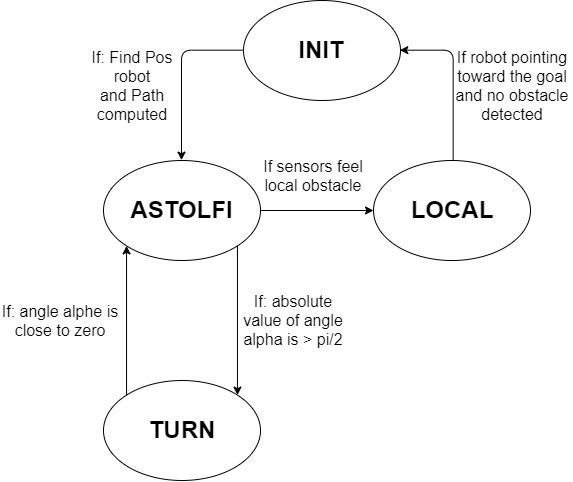

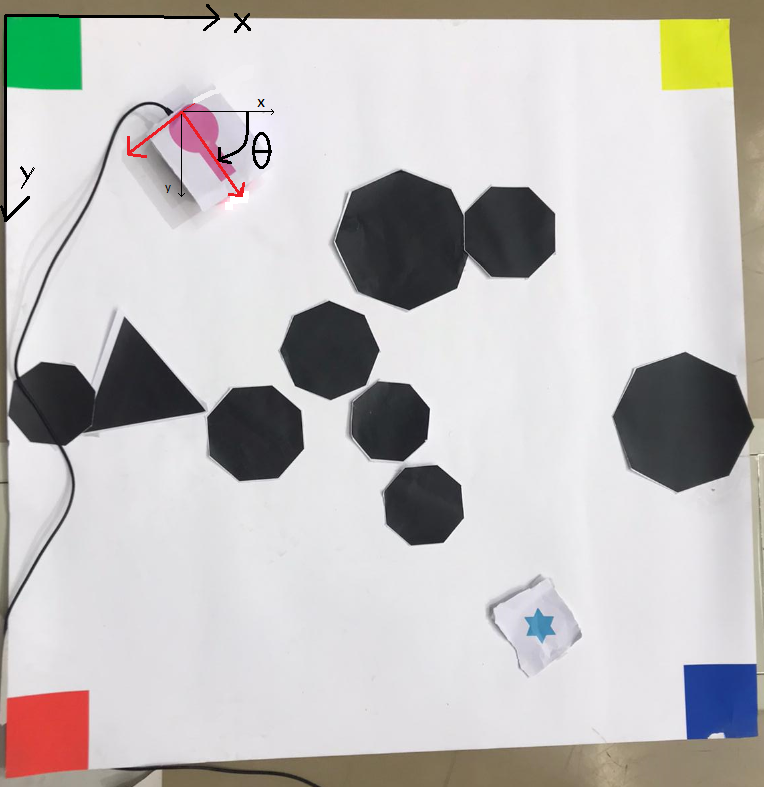

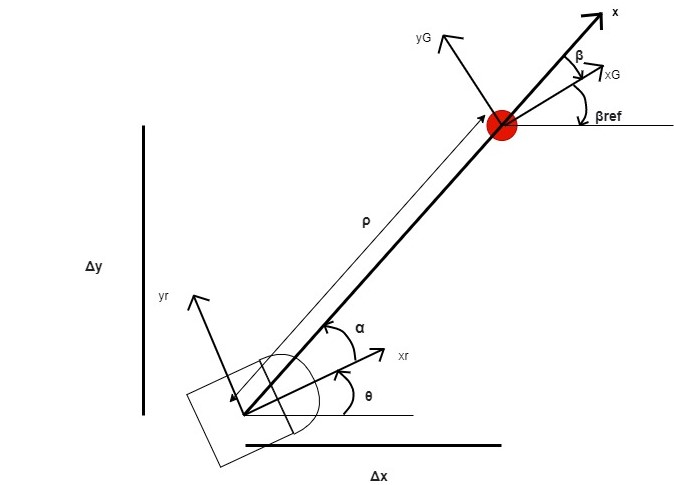

The values for alpha beta and rho are : 


$\alpha = atan2(\Delta y,\Delta x)$ 

$\rho=\sqrt{\Delta x^2+\Delta y^2}$

$\beta=\alpha-\theta-\beta_{ref}$

$\beta_{ref}$ will be computed at the next node of the global path and it's value will be equal to the angle between the x axis and the line connecting the two node of the